## Task 2

Create a neural net for Fashion MNIST with 100 hidden layers, using the sigmoid, ReLU, ELU, and SELU activation functions, and discuss the vanishing/exploding gradients problem using each of the mentioned activation functions.

In [3]:
import sys
import numpy as np
import matplotlib
import sklearn
import tensorflow as tf
import torch

print("Python:", sys.version)
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)
print("TensorFlow:", tf.__version__)
print("Keras:", tf.keras.__version__)
print("PyTorch:", torch.__version__)

Python: 3.13.3 (tags/v3.13.3:6280bb5, Apr  8 2025, 14:47:33) [MSC v.1943 64 bit (AMD64)]
NumPy: 2.4.1
Matplotlib: 3.10.8
scikit-learn: 1.8.0
TensorFlow: 2.20.0
Keras: 3.13.1
PyTorch: 2.10.0+cpu


In [4]:

import matplotlib.pyplot as plt


# Split the data into training and testing
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', train_X.shape)
print('Test: X = ', test_X.shape)

print('Train: Y = ', train_Y.shape)
print('Test: Y = ', test_Y.shape)



Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)
Train: Y =  (60000,)
Test: Y =  (10000,)


In [5]:
train_X, train_Y, val_X, val_Y =  train_X[:-5000], train_Y[:-5000], train_X[-5000:], train_Y[-5000:]

print('Train: X = ', train_X.shape)
print('train: Y = ', train_Y.shape)

print('val: x = ', val_X.shape)
print('val: y = ', val_Y.shape)




Train: X =  (55000, 28, 28)
train: Y =  (55000,)
val: x =  (5000, 28, 28)
val: y =  (5000,)


In [6]:
def build_model(activation, layers=100):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    model.add(tf.keras.layers.Dense(64, activation=activation))

    for _ in range(layers - 1):
        model.add(tf.keras.layers.Dense(32, activation=activation))

    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [7]:
model_sigmoid = build_model('sigmoid')

model_sigmoid.summary()

c:\Users\beruk\DEEPLEARN-ING\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         1,05

 Total params: 156,138 (609.91 KB)

 Trainable params: 156,138 (609.91 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:

sigmoid_history = model_sigmoid.fit(train_X, train_Y, epochs=5, validation_data=(val_X, val_Y))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 47s 11ms/step - accuracy: 0.0996 - loss: 2.3065 - val_accuracy: 0.1044 - val_loss: 2.3052
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.0987 - loss: 2.3053 - val_accuracy: 0.0994 - val_loss: 2.3038
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.0988 - loss: 2.3051 - val_accuracy: 0.0934 - val_loss: 2.3058
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.0971 - loss: 2.3050 - val_accuracy: 0.0980 - val_loss: 2.3061
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.0973 - loss: 2.3047 - val_accuracy: 0.1006 - val_loss: 2.3051


In [9]:
Relu_model = build_model('relu')
Relu_history = Relu_model.fit(train_X, train_Y, epochs=5, validation_data=(val_X, val_Y))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 55s 12ms/step - accuracy: 0.0999 - loss: 2.3028 - val_accuracy: 0.1006 - val_loss: 2.3027
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1016 - val_loss: 2.3026
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.0999 - loss: 2.3028 - val_accuracy: 0.0900 - val_loss: 2.3030
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.0962 - loss: 2.3028 - val_accuracy: 0.0900 - val_loss: 2.3031
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.0900 - val_loss: 2.3030


In [10]:
Elu_model = build_model('elu')
Elu_history = Elu_model.fit(train_X, train_Y, epochs=5, validation_data=(val_X, val_Y))

c:\Users\beruk\DEEPLEARN-ING\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 35s 8ms/step - accuracy: 0.1014 - loss: 2.3032 - val_accuracy: 0.1054 - val_loss: 2.3032
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.0979 - loss: 2.3036 - val_accuracy: 0.0994 - val_loss: 2.3034
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1019 - loss: 2.3033 - val_accuracy: 0.0994 - val_loss: 2.3028
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.0995 - loss: 2.3032 - val_accuracy: 0.1030 - val_loss: 2.3037
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.0994 - loss: 2.3032 - val_accuracy: 0.0994 - val_loss: 2.3036


In [11]:
selu_model = build_model('selu')
selu_history = selu_model.fit(train_X, train_Y, epochs=5, validation_data=(val_X, val_Y))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - accuracy: 0.0996 - loss: 2.3224 - val_accuracy: 0.0900 - val_loss: 2.3287
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.1005 - loss: 2.3147 - val_accuracy: 0.1042 - val_loss: 2.3161
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1005 - loss: 2.3116 - val_accuracy: 0.0900 - val_loss: 2.3124
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.0990 - loss: 2.3102 - val_accuracy: 0.1016 - val_loss: 2.3123
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1017 - loss: 2.3087 - val_accuracy: 0.0980 - val_loss: 2.3081


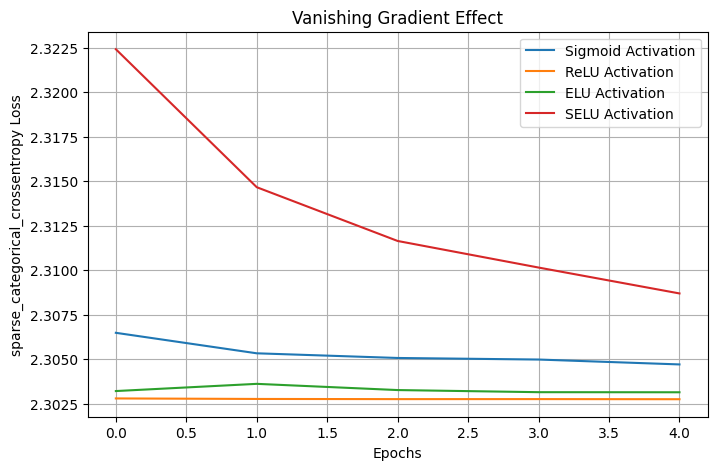

In [13]:
plt.figure(figsize=(8,5))
plt.plot(sigmoid_history.history['loss'], label='Sigmoid Activation')
plt.plot(Relu_history.history['loss'], label='ReLU Activation')
plt.plot(Elu_history.history['loss'], label='ELU Activation')
plt.plot(selu_history.history['loss'], label='SELU Activation')
plt.xlabel('Epochs')
plt.ylabel('sparse_categorical_crossentropy Loss')
plt.title('Vanishing Gradient Effect')
plt.legend()
plt.grid(True)
plt.show()